# 深度生成模型

生成模型即选择一个概率模型$p(\pmb{x})$来拟合数据，并以此模型生成新样本。最常见的概率生成模型为

\begin{equation}
\label{eq:gaussian-gen-model}
p(\pmb{x})=\frac{1}{\sqrt{(2\pi)^d\lvert \pmb{\Sigma}\rvert}}\exp\left( -\frac12(\pmb{x}-\pmb{\mu})  \pmb{\Sigma}^{-1} (\pmb{x}-\pmb{\mu})^\top \right)
\end{equation}

生成模型的主要工作由以下2个部分组成：

- 模型选择. 选择假定最适合数据样本分布

- 参数估计. 确定所选模型的最优参数

## 高斯生成模型



In [5]:
import numpy as np
from dataset.height_weight import load_height_weight

xs = load_height_weight()
print(xs.shape)

(25000, 2)


选择前200个数据绘制散点图，查看数据特性。

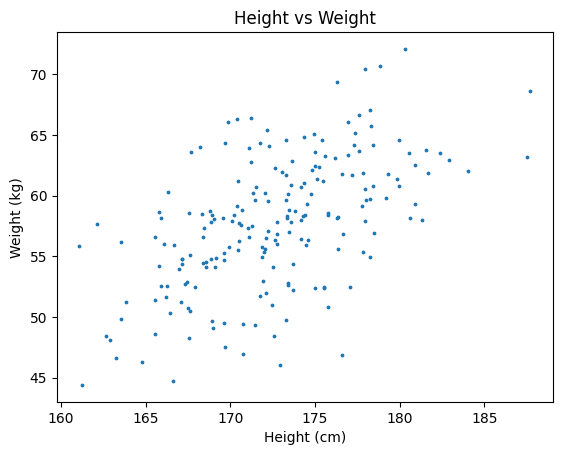

In [6]:
import matplotlib.pyplot as plt
# 选择前200个数据绘制散点图，查看数据特性。
plt.scatter(xs[:200, 0], xs[:200, 1], s=3)
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Height vs Weight")
plt.show()

高斯生成模型的两个参数$\hat{\pmb{\mu}},\hat{\pmb{\Sigma}}$分别为，

$$
\begin{split}
\hat{\pmb{\mu}} &= \frac1N\sum_{i=1}^n\pmb{x}\\
\hat{\pmb{\Sigma}} &= \frac1N\sum_{i=1}^N (\pmb{x}_i-\pmb{\mu})(\pmb{x}_i-\pmb{\mu})^\top
\end{split}
$$(mle-gaussian)

使用上述数据集，可以计算以上两个参数估计如下：

In [7]:
mu_hat = np.mean(xs, axis=0)
sigma_hat = np.cov(xs, rowvar=False)

print("Estimated mean (mu_hat):\n", mu_hat)
print("Estimated covariance (sigma_hat):\n", sigma_hat)

Estimated mean (mu_hat):
 [172.70250854  57.6422088 ]
Estimated covariance (sigma_hat):
 [[23.33145108 12.84736477]
 [12.84736477 27.97658708]]


确定最优参数后，可以绘制数据的分布如下：

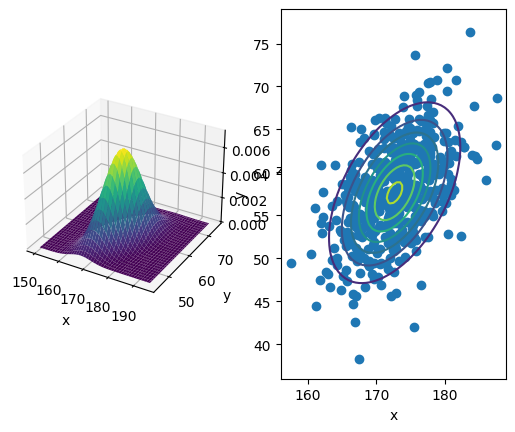

In [8]:
def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    D = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** D * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y

small_xs = xs[:500]
X, Y = np.meshgrid(np.arange(150, 195, 0.5),
                   np.arange(45, 75, 0.5))
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu_hat, sigma_hat)

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(small_xs[:,0], small_xs[:,1])
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_xlim(156, 189)
ax2.set_ylim(36, 79)
ax2.contour(X, Y, Z)
plt.show()


### 高斯混合模型

$$
p(\pmb{x})=\sum_{i=1}^K \pi_k \mathcal{N}(\pmb{x},\pmb{\mu}_k,\pmb{\Sigma}_k)
$$

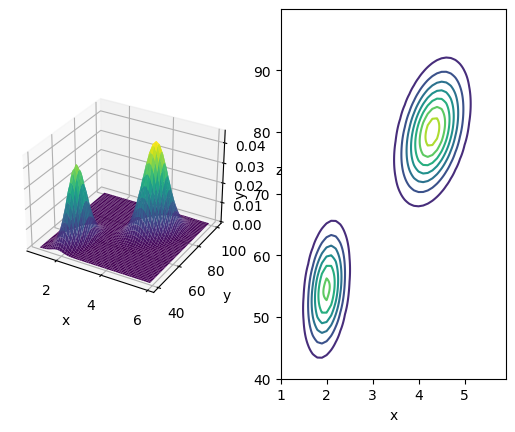

In [ ]:
def gmm(x, pis, mus, sigmas):
    """
    计算高斯混合模型的概率密度函数
    :param x: 输入数据点
    :param pis: 混合系数
    :param mus: 均值向量
    :param sigmas: 协方差矩阵
    :return: 概率密度值
    """
    K = len(pis)
    px = 0.0 
    for k in range(K):
        mu = mus[k]
        sigma = sigmas[k]
        px += pis[k] * multivariate_normal(x, mu, sigma)    
    return px
# 测试 gmm 函数
xs = np.arange(1, 6, 0.1)
ys = np.arange(40, 100, 0.1) 
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)
pis = [0.35, 0.65]
mus = np.array([[2.0, 54.50],[4.3, 80.0]])
sigmas = np.array([[[0.07, 0.44], [0.44, 33.7]],
                   [[0.17, 0.94], [0.94, 36.0]]])

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = gmm(x, pis, mus, sigmas)

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.contour(X, Y, Z)
plt.show()